In [1]:
import scvelo as scv
import pandas as pd
import anndata
import matplotlib.pyplot as plt
scv.set_figure_params()

In [2]:
adata = scv.read("D:/Bioinfrolf/scvelo/merged.loom", cache=True)

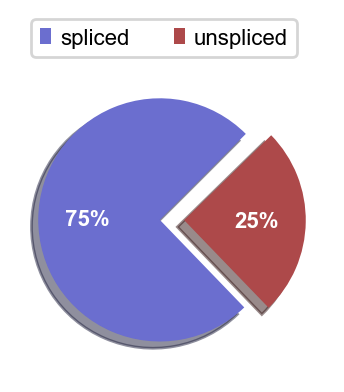

In [3]:
scv.pl.proportions(adata)

In [184]:
scv.pp.filter_and_normalize(adata, min_shared_counts=5, n_top_genes=2000)#1
scv.pp.moments(adata, n_pcs=23, n_neighbors=30)

Filtered out 7976 genes that are detected 5 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


scv.pp.filter_and_normalize(adata, min_shared_counts=15, n_top_genes=2000)#1
scv.pp.moments(adata, n_pcs=25, n_neighbors=30)

In [5]:
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 1/16 cores)


  0%|          | 0/281 [00:00<?, ?gene/s]

    finished (0:01:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/3597 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_scVelo-stream-s_1.png


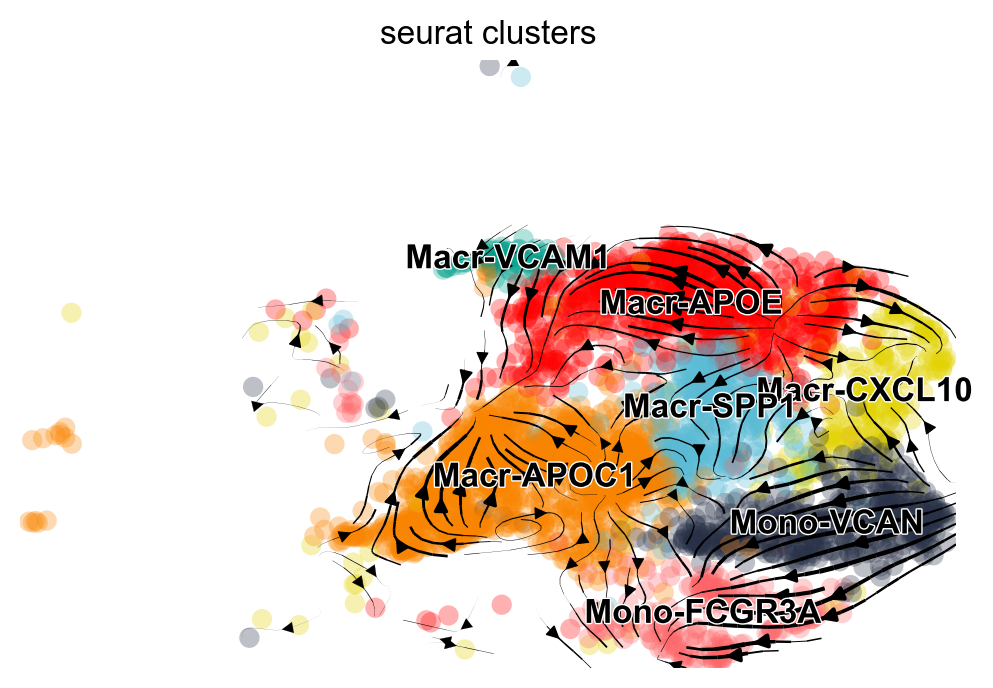

In [6]:
ident_colours = ["#F98400","#FF0000","#E2D200","#5BBCD6","#00A08A","#FD6467","#273046"]
scv.pl.velocity_embedding_stream(adata, basis='X_umap',color = "seurat_clusters",palette = ident_colours,
                                 save="scVelo-stream-s_1.png")

In [8]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata, groups='seurat_clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,0,0.33,0,0,0
2,0,0,0,0,0.02,0,0
3,0,0,0,0,0,0,0
4,0,0.15,0,0,0,0,0
5,0.044,0,0,0,0,0,0
6,0,0,0.39,0,0,0.13,0


saving figure to file ./figures/scvelo_scVelo-paga-s_1.png


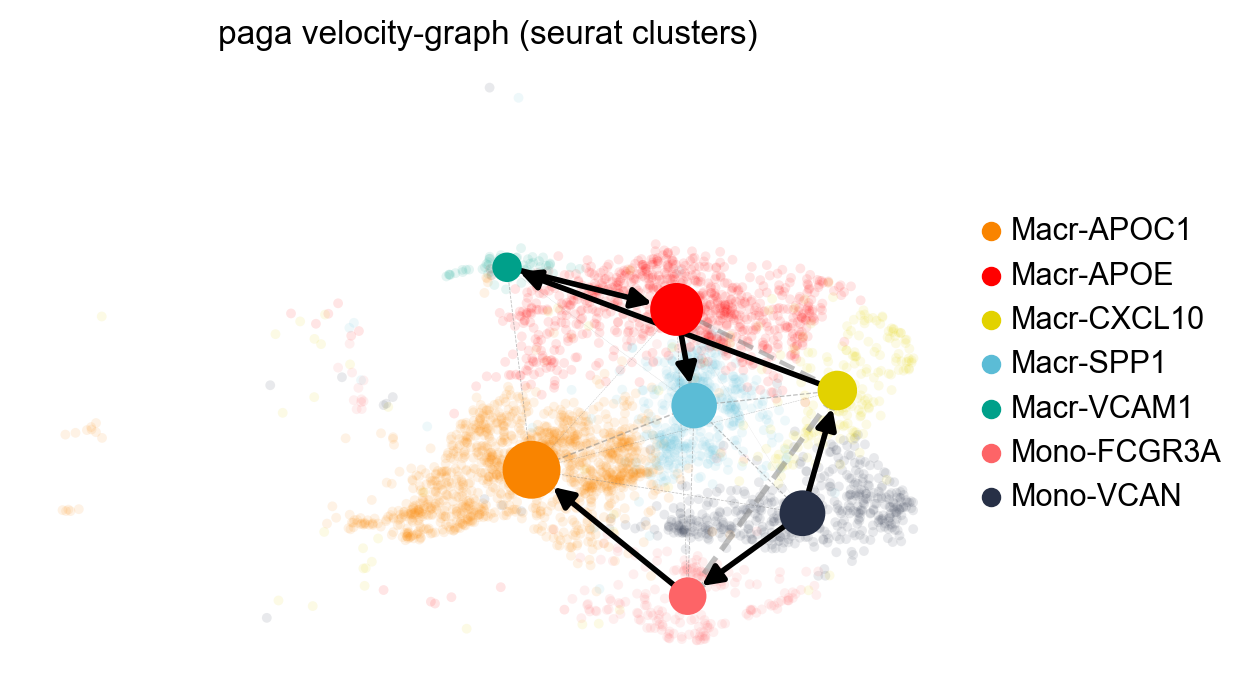

In [9]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5,save="scVelo-paga-s_1.png")

saving figure to file ./figures/scvelo_scVelo-paga-s_20.png


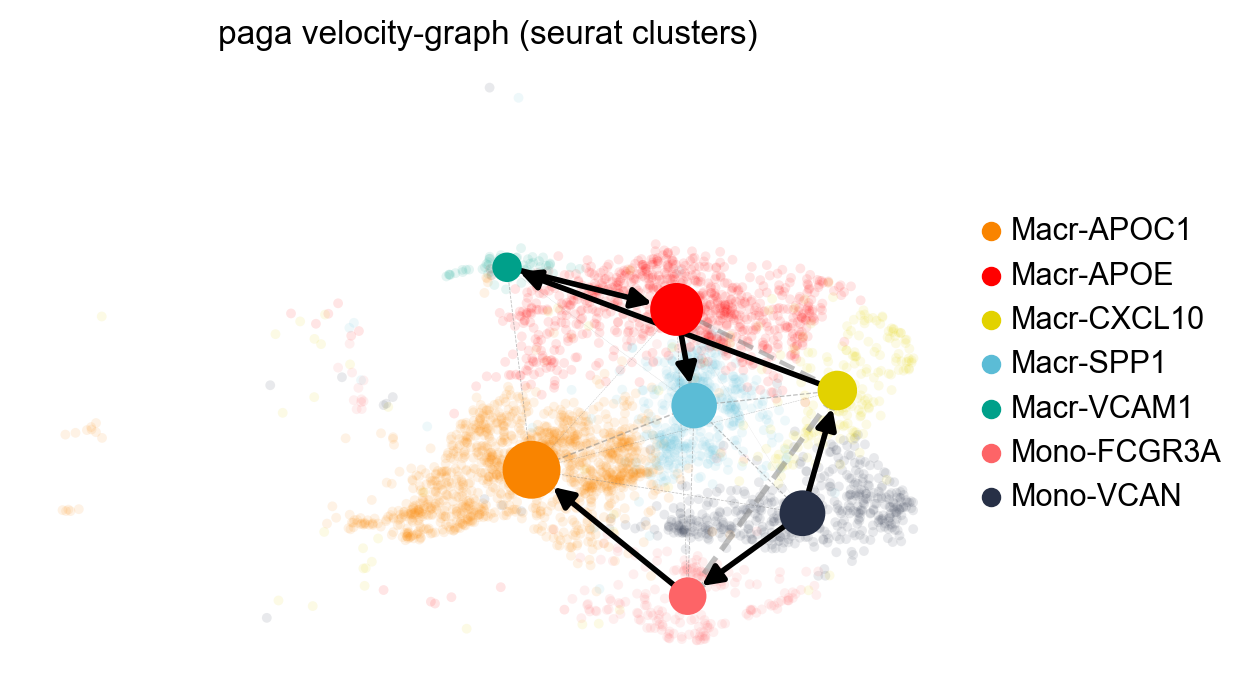

In [125]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5,save="scVelo-paga-s_20.png")

saving figure to file ./figures/scvelo_heatmap_scVelo-gene-s_1.png


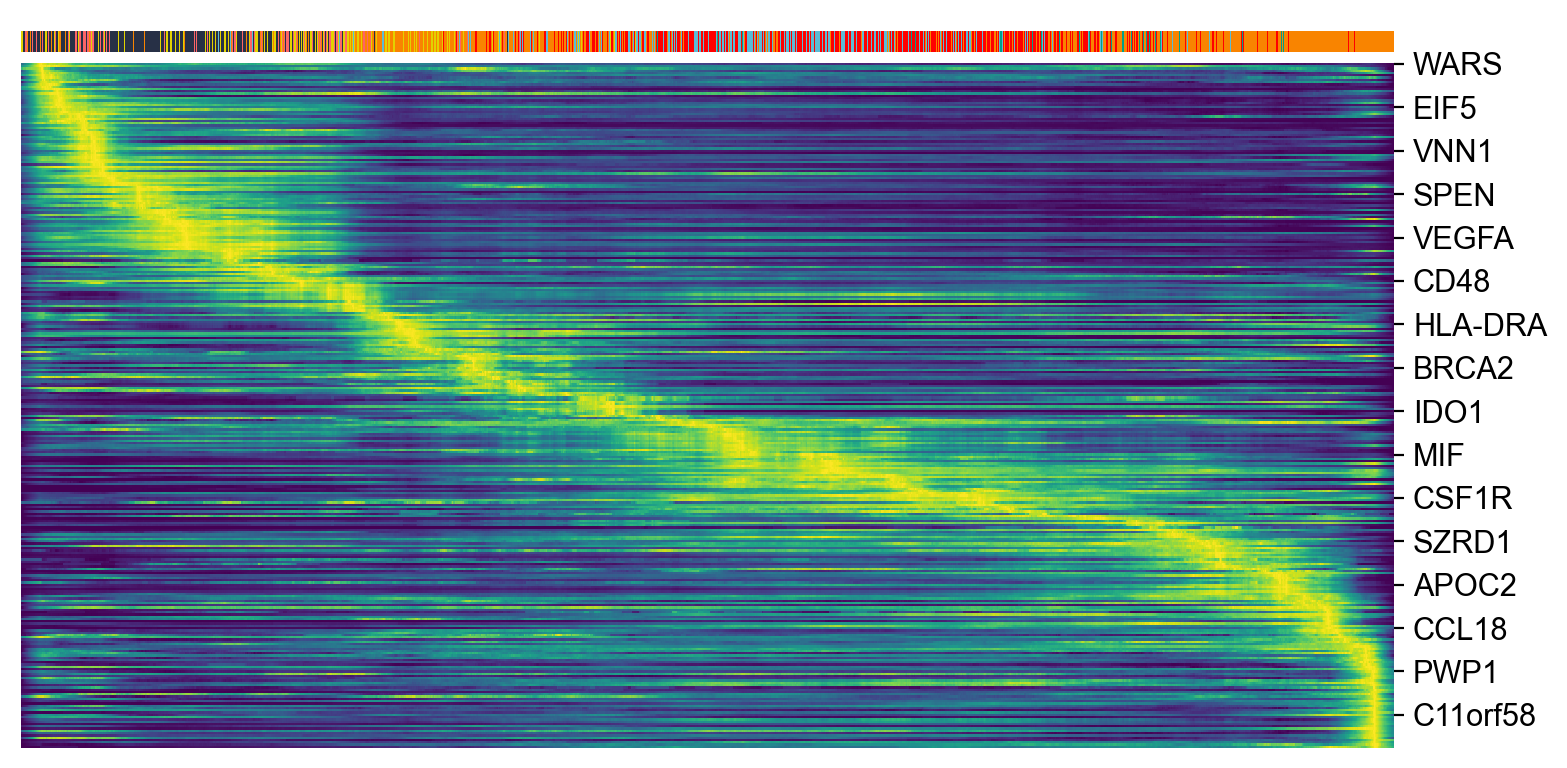

In [12]:
#velocity_pseudotime
#latent_time
scv.pl.heatmap(adata, var_names=top_genes, sortby='velocity_pseudotime', col_color='seurat_clusters', n_convolve=100,save="scVelo-gene-s_1.png")

In [13]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False)
top_genes

Gene
MALAT1      0.35
LGMN        0.30
SPP1        0.30
HSPD1       0.29
DNAJA4      0.29
            ... 
AGPAT3       NaN
TRAPPC10     NaN
TRPM2        NaN
DIP2A        NaN
PRMT2        NaN
Name: fit_likelihood, Length: 2000, dtype: float64

In [15]:
top_genes.to_csv("veloGenes.csv")